In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ensure plots show inline
%matplotlib inline


In [2]:
# Parameters
img_dir = r"C:\Users\SIL-Laptop\Desktop\Final IAI Gustavo\steganography\MMS Captures from IEDScout\RF\RF_MMS_Images"  # Folder: RF_MMS_Images/Attack/, Normal/, Faulty/
img_size = (64, 64)
class_names = ['Attack', 'Normal', 'Faulty']


In [3]:
# Load images and labels
print("🔄 Loading images...")
X, y = [], []

for label, class_name in enumerate(class_names):
    class_folder = os.path.join(img_dir, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path).resize(img_size)
        img_array = np.array(img).flatten() / 255.0  # Normalize
        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"✅ Loaded {len(X)} images with {X.shape[1]} features each.")
    

🔄 Loading images...
✅ Loaded 1810 images with 4096 features each.


In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Training samples: {len(X_train)}, Test samples: {len(X_test)}")


✅ Training samples: 1448, Test samples: 362


In [5]:
# Parameter grid
n_estimators_list = [100, 200, 300]
max_depth_list = [None, 10, 20]

best_acc = 0
best_params = {}
best_model = None
best_y_pred = None

print("\n🎯 Trying different parameter combinations...")
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        print(f"➡️ Trying n_estimators={n_estimators}, max_depth={max_depth}...")
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=6553)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"   🔹 Accuracy: {acc * 100:.2f}%")

        if acc > best_acc:
            best_acc = acc
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_model = rf
            best_y_pred = y_pred



🎯 Trying different parameter combinations...
➡️ Trying n_estimators=100, max_depth=None...
   🔹 Accuracy: 67.68%
➡️ Trying n_estimators=100, max_depth=10...
   🔹 Accuracy: 64.09%
➡️ Trying n_estimators=100, max_depth=20...
   🔹 Accuracy: 66.85%
➡️ Trying n_estimators=200, max_depth=None...
   🔹 Accuracy: 67.13%
➡️ Trying n_estimators=200, max_depth=10...
   🔹 Accuracy: 65.19%
➡️ Trying n_estimators=200, max_depth=20...
   🔹 Accuracy: 66.57%
➡️ Trying n_estimators=300, max_depth=None...
   🔹 Accuracy: 66.85%
➡️ Trying n_estimators=300, max_depth=10...
   🔹 Accuracy: 63.81%
➡️ Trying n_estimators=300, max_depth=20...
   🔹 Accuracy: 66.57%


In [6]:
# Best model summary
print("\n🏆 Best Parameters:")
print(f"   n_estimators: {best_params['n_estimators']}")
print(f"   max_depth: {best_params['max_depth']}")
print(f"   Accuracy: {best_acc * 100:.2f}%")



🏆 Best Parameters:
   n_estimators: 100
   max_depth: None
   Accuracy: 67.68%


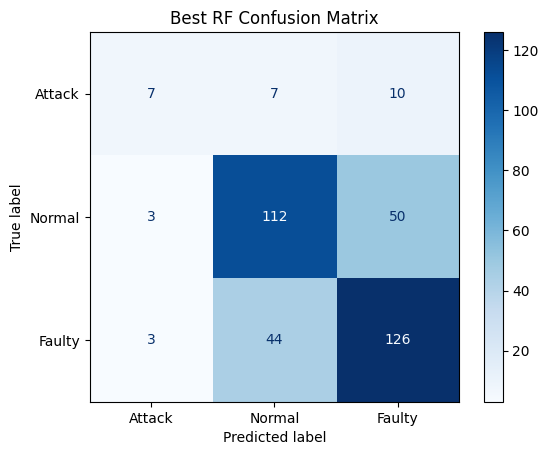

✅ Confusion matrix saved as best_rf_confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [7]:
cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Best RF Confusion Matrix")
plt.show()

# Optionally save
save_path = "best_rf_confusion_matrix.png"
plt.savefig(save_path)
print(f"✅ Confusion matrix saved as {save_path}")


In [8]:
print("\n📝 Classification Report (Best Model):")
print(classification_report(y_test, best_y_pred, target_names=class_names))



📝 Classification Report (Best Model):
              precision    recall  f1-score   support

      Attack       0.54      0.29      0.38        24
      Normal       0.69      0.68      0.68       165
      Faulty       0.68      0.73      0.70       173

    accuracy                           0.68       362
   macro avg       0.63      0.57      0.59       362
weighted avg       0.67      0.68      0.67       362

